In [1]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

# Load data

Below we load data from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/) to better understand how to use linear regressions.

> The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [2]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In this dataset Sales is the dependent variable (Y), while TV, Radio and Newspaper are indepednent varialbes (X1, X2 and X3 respectively)

>  It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

While our goal as journalists is rarely to instruct clients, we are interested in explaining phenomena. How much of this phenomenon of sales can be explained by the tree predictor variables (X1, X2 and X3) using a linear model? 

Let's find out...once we grasp the basics, we can move on to journalistic applicaitons.

# Exploring the data

From the documentation
> Advertising data sales (in thousands of units) for a particular product and advertising budgets (in thousands of dollars) for TV, radio, and newspaper media

In [3]:
# summary stats
advertising.describe().round(1)


,TV,Radio,Newspaper,Sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,14.0
std,85.9,14.8,21.8,5.2
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,10.4
50%,149.8,22.9,25.8,12.9
75%,218.8,36.5,45.1,17.4
max,296.4,49.6,114.0,27.0


/opt/homebrew/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/opt/homebrew/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.
/opt/homebrew/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


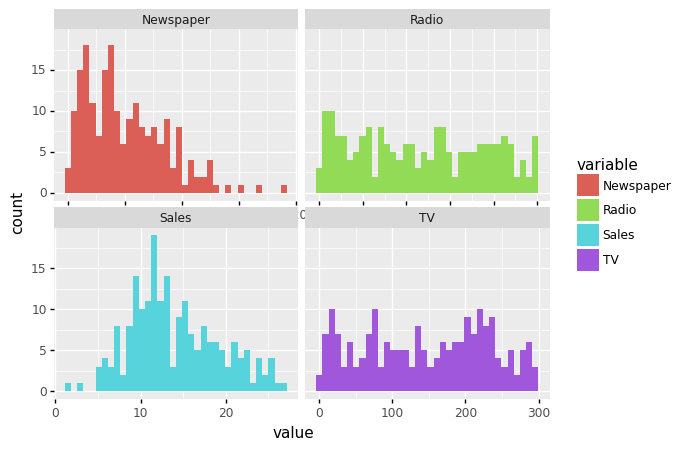

<ggplot: (331503960)>

In [4]:
# looking at the distributions
to_plot = advertising.melt()
(
    ggplot(to_plot, aes(x='value', fill='variable')) + 
        geom_histogram() + facet_wrap('variable', scales='free_x')
)
 

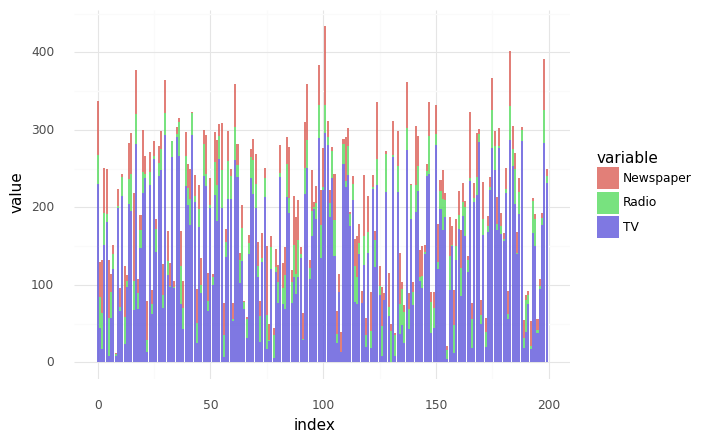

<ggplot: (331911861)>

In [5]:
# Each data point is a media market. I want a representation of the data that shows each data point
(
    ggplot(advertising.reset_index().melt(id_vars='index').query("variable!='Sales'"), 
           aes(y='value', x='index', fill='variable')) + 
        geom_col(alpha=.8) +
        theme_minimal()
)
 

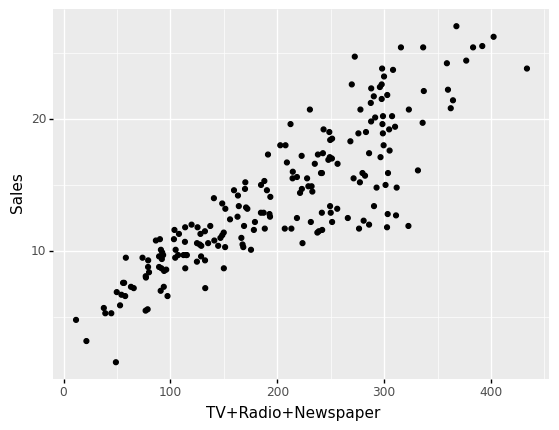

<ggplot: (331960263)>

In [6]:
# Is there a correlation between ad spending and sales?
(
    ggplot(advertising, aes(x='TV+Radio+Newspaper', y='Sales')) + geom_point()
)

/opt/homebrew/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


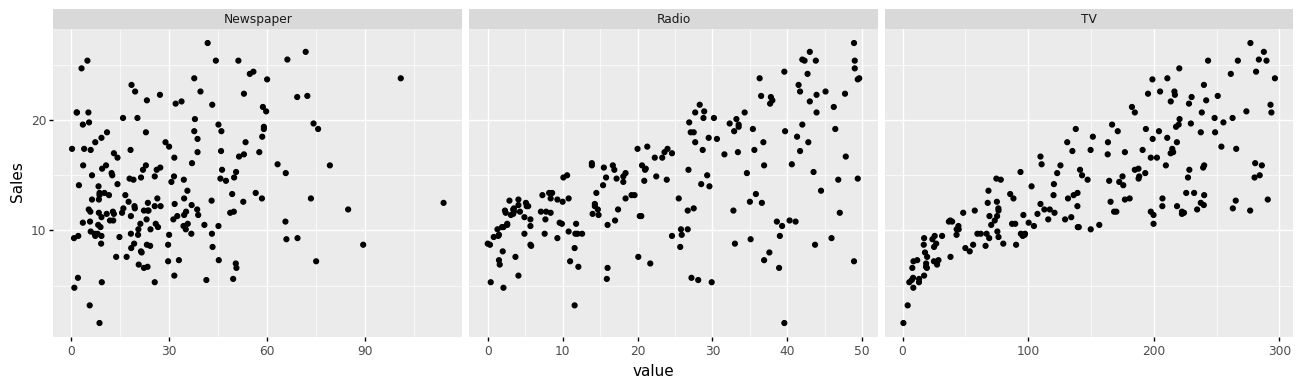

<ggplot: (332063772)>

In [7]:
# Hmm...how about each type of spending?

to_plot = advertising.reset_index().melt(id_vars=['index','Sales'])
(
    ggplot(to_plot, aes(x='value', y='Sales')) + 
        geom_point() + 
        facet_wrap('variable', scales='free_x') +
        theme(figure_size=(16, 4))
)

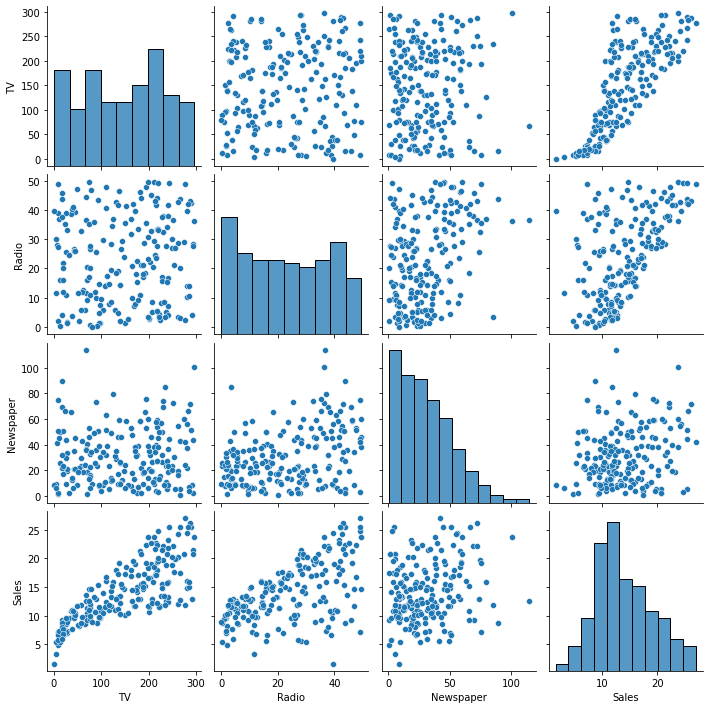

In [8]:
# Sometimes it's nice to make a pairplot to quickly see relationships between variables

# Seaborn visualization library
import seaborn as sns
sns.pairplot(advertising)


# Regression models

In [9]:
import statsmodels.formula.api as smf

# Trying out various models using forward selection
# model = smf.ols("Sales ~ TV", data=advertising)
# model = smf.ols("Sales ~ Radio", data=advertising)
# model = smf.ols("Sales ~ Newspaper", data=advertising)
# model = smf.ols("Sales ~ TV + Radio + Newspaper", data=advertising)
model = smf.ols("Sales ~ TV + Radio", data=advertising)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.83e-98
Time:                        13:21:29   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interaction effects

![](assets/interaction-effect.png)

In [10]:
import statsmodels.formula.api as smf

# re-run the model, taking into account that interaction effect
model = smf.ols("Sales ~ TV + Radio + TV:Radio", data=advertising)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          6.68e-146
Time:                        13:21:30   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Appendix: Quick reference for the statsmodels python package

https://investigate.ai/reference/regression/